<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 6</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Matias Armijo</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

## 1. Operaciones para extracción de características.

### 1.1 Con un audio (voz o música) no mayor a 30 segundos, utilizando la libreria Librosa (https://librosa.org/), numpy, pytorch, implementa operaciones fundamentales como: 
- Media
- Kurtosis
- Skewness
- Zero Crossing Rate 
- Spectral Centroid
- Energía
- RMSE
- Frecuencia fundamental
<p align="justify">
Estas operaciones son fundamentales en el proceso de extracción de características. Explica el resultado obtenido y que significa cada uno.

Media = 1.84927366681187e-05
Kurtosis = 0.5476968288421631
Skewness (Oblicuidad) = -0.14241441406251398
Zero Crossing Rate = 4.618075801749271 %
Energia = 3600.8782 Joules
RMSE = 0.10800301999743042
Frecuencia fundamental = 221.64285714285714 Hz


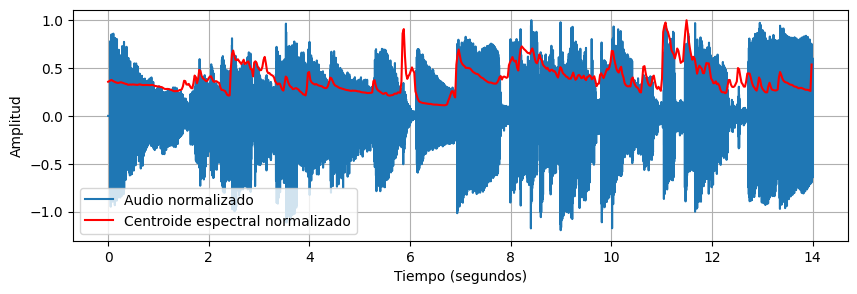

In [36]:
from IPython.display import Audio
import matplotlib.pyplot as plt
import librosa
import numpy as np

# Carga de archivos con libros
audio, fs = librosa.load("audio.wav")
duracion = len(audio)/fs
tiempo = np.linspace(0,duracion,len(audio))

# Obtencion de Media (mean)
def media_function(x):
    y = np.sum(x)/len(x)
    print('Media =', y)
    return y

media = media_function(audio)

# Obtencion Kurtosis
def kurtosis_function(x):
    media = np.mean(x)
    desviacion_estandar = np.std(x)
    kurtosis = np.mean(((x-media)/desviacion_estandar)**4)-3
    print('Kurtosis =', kurtosis)
    return kurtosis

kurtosis = kurtosis_function(audio)

# Obtencion Skewness
def skewness_function(x):
    media = np.mean(x)
    desviacion_estandar = np.std(x)
    n = len(x)
    skewness = (np.sum((x - media)**3) / (n * desviacion_estandar**3))
    print('Skewness (Oblicuidad) =', skewness)
    return skewness

skewness = skewness_function(audio)

# Obtencion Zero-Crossing-Rate
def zero_crossing_rate_function(x):
    cruces_por_cero = librosa.zero_crossings(x,pad=False)
    tasa_cruces_por_cero = sum(cruces_por_cero)/len(cruces_por_cero)
    print('Zero Crossing Rate =', tasa_cruces_por_cero*100,'%' )
    return tasa_cruces_por_cero

zero_crossing_rate = zero_crossing_rate_function(audio)

# Obtencion del spectral centroid
def spectral_centroid_function(audio,fs):
    spectral_centroids = librosa.feature.spectral_centroid(y=audio, sr=fs)[0]
    frames = range(len(spectral_centroids))
    t = librosa.frames_to_time(frames)
    return spectral_centroids, t

# obtencion del centroide del espectro
spectral_centroid, t = spectral_centroid_function(audio,fs)

plt.figure(figsize=(10,3))
plt.plot(tiempo,audio/max(audio),label='Audio normalizado')
plt.plot(t, spectral_centroid/max(spectral_centroid), color='r', label='Centroide espectral normalizado'); 
plt.grid(True)
plt.legend()
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')

# Energia del audio
def energy_function(x):
    energia = np.sum(x ** 2)
    print('Energia =', energia, 'Joules')
    return energia

energia = energy_function(audio)

# Obtencion del root mean square energy (RMSE)
def RMSE_function(x):
    RMSE = np.sqrt(1/len(x)*np.sum(audio ** 2))
    print('RMSE =',RMSE)
    return RMSE

RMSE = RMSE_function(audio)

# Obtencion de la frecuencia fundamental 
def frecuencia_fundamental_function(x,fs):
    
    # Calcular la transformada de Fourier
    fft = np.fft.fft(x)

    # Calcular las frecuencias correspondientes a las muestras
    frecuencias = np.fft.fftfreq(len(x), 1/fs)

    # Encontrar el índice del pico dominante en el espectro de frecuencia
    indice_pico = np.argmax(np.abs(fft))

    # Obtener la frecuencia fundamental
    frecuencia_fundamental = frecuencias[indice_pico]

    print('Frecuencia fundamental =',frecuencia_fundamental, 'Hz')

    return frecuencia_fundamental

frecuencia_fundamental = frecuencia_fundamental_function(audio,fs)


Audio(audio,rate=fs)


**Explicaciones:**

**Media:** La media de una señal de audio representa el promedio de todas las muestras en la señal, lo que proporciona una medida del valor central o típico de la amplitud de la señal. La funcion implementa este cálculo mediante la función ***media_function***, que suma todas las muestras en la señal y luego divide por el número total de muestras para obtener el promedio. Al llamar a esta función con la señal de audio como entrada, se calcula y almacena la media de la señal, lo que permite entender su nivel de amplitud promedio.

**Kurtosis:** La función ***kurtosis_function*** en Python calcula la kurtosis de una distribución de datos representada por el arreglo x. La kurtosis es una medida estadística que describe la forma de la distribución de datos, indicando su grado de concentración en torno a la media. Para ello, primero se calcula la media y la desviación estándar de los datos. Luego, utiliza la fórmula de kurtosis, que implica elevar al cuarto poder la diferencia entre cada punto de datos y la media, dividido por la desviación estándar, y luego toma la media de estos valores y resta 3. Finalmente, se imprime el valor de kurtosis calculado.

**Skewness:** La skewness, o oblicuidad, es una medida estadística que describe la asimetría de la distribución de datos alrededor de su media. En el contexto del procesamiento de audio, esta medida es útil para comprender cómo se distribuyen las amplitudes de las muestras de audio. La funcion implementada calcula la skewness de una señal de audio dada mediante la fórmula estadística que implica la diferencia entre cada muestra y la media, elevada al cubo, sumando estos valores y luego dividiendo por el producto de la longitud de la señal y la desviación estándar al cubo. Esto proporciona un indicador numérico de la asimetría de la distribución de amplitudes en la señal de audio.

**Zero Crossing rate:** El "Zero Crossing Rate" (Tasa de Cruces por Cero) es una medida que indica la frecuencia con la que una señal de audio cruza el eje horizontal (cero) en un intervalo de tiempo determinado. Es útil para caracterizar la naturaleza percusiva o tonal de una señal de audio: una tasa alta de cruces por cero sugiere una señal más ruidosa o percusiva, mientras que una tasa baja indica una señal más suave o tonal. La funcion implementada utiliza la función ***zero_crossings*** de librosa para encontrar los cruces por cero en la señal de audio x, luego calcula la tasa dividiendo el número total de cruces por cero encontrados entre la longitud total de la señal, expresando el resultado como un porcentaje y devolviendo el valor calculado.

**Spectral centroid:*** El "spectral centroid" (centroide espectral) es una medida que indica el centro de masa espectral de una señal de audio, lo que significa que representa la frecuencia promedio ponderada por la energía espectral. En esencia, es el punto en el espectro de frecuencia donde una señal de audio tiene su "centro de gravedad" en términos de energía. La función implementada calcula el centroide espectral de una señal de audio utilizando la función ***librosa.feature.spectral_centroid***. Esta función toma como entrada la señal de audio audio y la frecuencia de muestreo ***fs***, y devuelve una matriz de centroides espectrales calculados para cada trama de la señal. Luego, se convierten los índices de las tramas en valores de tiempo utilizando ***librosa.frames_to_time***. Después de obtener el centroide espectral, el código traza la forma de onda de la señal de audio normalizada ***(audio/max(audio))*** junto con el centroide espectral normalizado ***(spectral_centroid/max(spectral_centroid))***. Esto permite visualizar cómo varía el centroide espectral a lo largo del tiempo en relación con la señal de audio.

**Energia:** La energía de una señal de audio representa la cantidad total de potencia o amplitud contenida en la señal a lo largo del tiempo, lo que indica su fuerza o volumen total. La función implementada calcula la energía de una señal de audio mediante la función ***energy_function***, que suma el cuadrado de cada muestra en la señal para obtener la energía total. Al llamar a esta función con la señal de audio como entrada, se calcula y almacena la energía de la señal, lo que permite evaluar su intensidad o volumen en términos de amplitud total.

**RMSE:** La RMSE (Root Mean Square Energy, Raíz Cuadrada de la Energía Media) de una señal de audio es una medida que indica la amplitud promedio de la señal a lo largo del tiempo, representando su intensidad normalizada. Este valor se calcula como la raíz cuadrada del promedio de los cuadrados de las amplitudes de la señal. La funcion implementa este cálculo mediante la función ***RMSE_function***, que calcula la RMSE de una señal de audio dada. Al llamar a esta función con la señal de audio como entrada, se obtiene y almacena la RMSE de la señal, lo que permite evaluar su intensidad promedio en términos de amplitud normalizada.

**Frecuencia fundamental:** La frecuencia fundamental de una señal de audio es la frecuencia más baja y principal presente en la señal, correspondiente al tono percibido. El código proporcionado utiliza la Transformada de Fourier para calcular esta frecuencia. Primero, convierte la señal de audio del dominio del tiempo al de la frecuencia. Luego, determina las frecuencias correspondientes a las muestras de la señal. Identifica el índice del pico dominante en el espectro de frecuencia, el cual representa la frecuencia fundamental. Después, imprime y devuelve esta frecuencia. Al llamar a la función con la señal de audio y la frecuencia de muestreo como entradas, se obtiene y almacena la frecuencia fundamental, brindando una medida del tono principal en la señal.



## 2. Implementaciones

### 2.1 Utilizando Pytorch Audio obtenga el espectrograma del audio original
El espectrograma debe producirse para valores número de muestras para la transformada rápida de fourier de  32, 128, 512. 



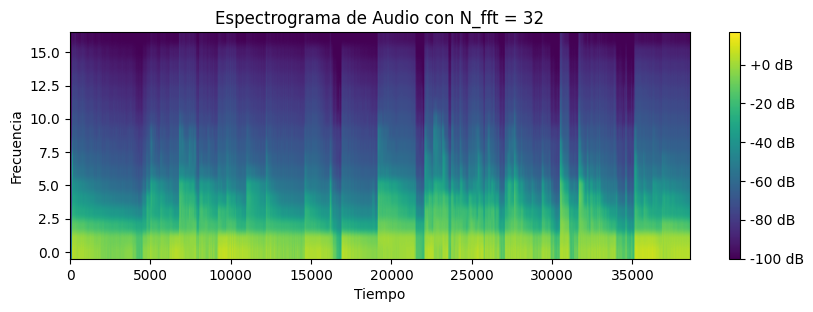

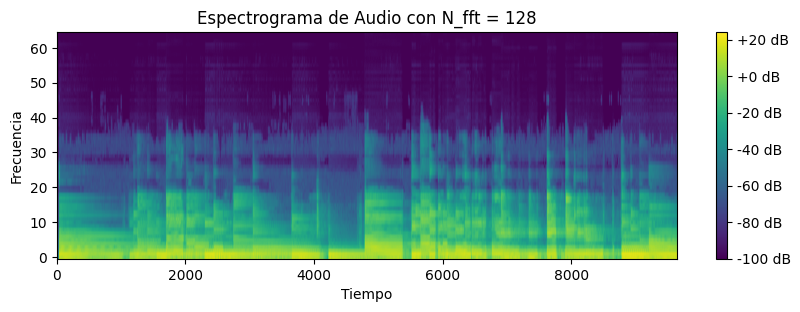

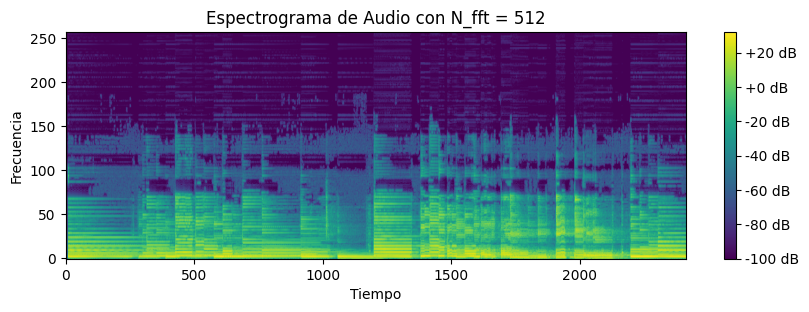

617400


In [8]:
import torchaudio
import matplotlib.pyplot as plt

# Cargar el archivo de audio

FFT_array = [32, 128, 512]


for i, n in enumerate(FFT_array):
    waveform, sample_rate = torchaudio.load('audio.wav')

    # Calcular el espectrograma
    specgram = torchaudio.transforms.Spectrogram(n_fft = n)(waveform)

    # Convertir a decibelios
    specgram_db = torchaudio.transforms.AmplitudeToDB()(specgram)

    # Graficar el espectrograma
    plt.figure(figsize=(10, 10))
    plt.subplot(3, 1, i+1)
    plt.imshow(specgram_db[0,:,:].numpy(), aspect='auto', origin='lower')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Espectrograma de Audio con N_fft = %i' %n)
    plt.xlabel('Tiempo')
    plt.ylabel('Frecuencia')
    plt.show()


### 2.2 Utilizando Pytorch audio y Librosa, implementa Mel Frequency Cepstral Coefficients (MFCCs) (opcional)

Sigue el siguiente ejemplo (https://www.kaggle.com/code/ilyamich/mfcc-implementation-and-tutorial) y explica que significa el resultado obtenido, graficando los coeficientes en un espectrograma. Investiga sobre Cepstral Analysis.


### 3. Audio Processing
### 3.1 En matlab, del paquete de procesamiento de audio, debes elegir una función de la librería, estudiarla y hacer un ejemplo.

Debes enviar un informe en PDF de 1 (una) página explicando, el algoritmo seleccionado, como funciona y el ejemplo que desarrollaste. Incluye por lo menos un gráfico que demuestre el trabajo realizado. 

Debes subir a tu repositorio el código en matlab con dicha solución.

En el sitio  https://la.mathworks.com/help/audio/index.html?s_tid=CRUX_lftnav y https://la.mathworks.com/help/audio/audio-processing-algorithm-design.html, encuentras diferentes funciones para generar efectos como reverberancia o control de la onda (compresores, gates, etc)

Así mismo, en el sitio https://la.mathworks.com/help/signal/measurements-and-feature-extraction.html, encuentras ejemplos para extracción de caracteristicas de la señal de audio, por ejemplo métricas de pulso y de transición.


    

## 5. Referencias
<p align="justify">
    
[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Análisis espectral] https://currents.soest.hawaii.edu/ocn_data_analysis/_static/Spectrum.html

[MFCC]https://medium.com/@derutycsl/intuitive-understanding-of-mfccs-836d36a1f779

[Cepstrum]https://www.kuniga.me/blog/2021/12/11/pitch-via-cepstrum.html

[LPC] https://www.youtube.com/watch?v=DIr6SPdK4NA

[LPC] https://www.kuniga.me/blog/2021/05/13/lpc-in-python.html

[MFCC] https://librosa.org/doc/0.10.1/generated/librosa.feature.mfcc.html#librosa.feature.mfcc

[MFCC] https://pytorch.org/audio/main/generated/torchaudio.transforms.MFCC.html
